# K-Means Clustering

In diesem Notebook besprechen wir das Vorgehen von K-Means Clustering

# Loading Packages and Data

In [130]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
import plotly.express as px
import matplotlib.pyplot as plt

In [131]:
X_train = pd.read_csv('Xtrain_feature_sel.csv')
X_test = pd.read_csv('Xtest_feature_sel.csv')
y_train = pd.read_csv('ytrain_mod.csv')
y_test = pd.read_csv('ytest_mod.csv')
print("Shape of X Train: {}".format(X_train.shape))
print("Shape of X Test: {}".format(X_test.shape))
print("Shape of y Train: {}".format(y_train.shape))
print("Shape of y Test: {}".format(y_test.shape))

Shape of X Train: (8672, 19)
Shape of X Test: (2168, 19)
Shape of y Train: (8672, 1)
Shape of y Test: (2168, 1)


In [132]:
# loading the data
data = pd.read_csv("googleplaystore.csv")
X = data.drop(columns = ['Installs'])
y = data['Installs']
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0)

# Binding Target value with explaining variables

In [133]:
train = pd.concat([X_train.reset_index(drop=True), y_train], axis=1)
train.head()

,Reviews,Rating,days_since_update,Price,Category_FAMILY,Category_GAME,Category_Rare,Category_TOOLS,Size_Varies with device,Size_0.1-10MB,Size_10.1-20MB,Size_30.1-40MB,Size_20.1-30MB,Type_Free,Content Rating_Everyone,Content Rating_Teen,Genres_Entertainment,Genres_Rare,Genres_Education,Installs
0,-0.144827,0.403271,-0.603588,0.0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1000000
1,-0.150937,-1.053274,0.637297,0.0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,50000
2,-0.151044,1.651738,3.887354,0.0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,100
3,-0.150943,1.027505,-0.613697,0.0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,10000
4,-0.122954,0.611349,-0.570733,0.0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,5000000


In [134]:
train.shape

(8672, 20)

In [135]:
test = pd.concat([X_test.reset_index(drop=True), y_test], axis=1)
test.shape

(2168, 20)

In [136]:
train_orig = pd.concat([X_train_orig.reset_index(drop=True), y_train_orig], axis=1)
train_orig.head()

,App,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
0,Choice Hotels,TRAVEL_AND_LOCAL,4.4,17915,Varies with device,Free,0,Everyone,Travel & Local,"July 18, 2018",Varies with device,Varies with device,"10,000+"
1,dv Prompter,VIDEO_PLAYERS,3.7,321,1.3M,Free,0,Everyone,Video Players & Editors,"March 14, 2017",1.2.9,4.2 and up,"500,000+"
2,DN Calculators,FINANCE,5.0,12,775k,Free,0,Everyone,Finance,"September 5, 2013",1.11,3.0 and up,"5,000,000+"
3,Goody.ba,FAMILY,4.7,303,42M,Free,0,Everyone,Entertainment,"July 22, 2018",2.0.5,4.1 and up,"50,000,000+"
4,Western Union US - Send Money Transfers Quickly,FINANCE,4.5,80904,16M,Free,0,Everyone,Finance,"July 5, 2018",5.7,4.1 and up,"100,000+"


# Model

Bestimmung der Anzahl Cluster k

In [137]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(train)
    distortions.append(kmeanModel.inertia_)

C:\Users\buech\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\buech\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\buech\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\buech\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

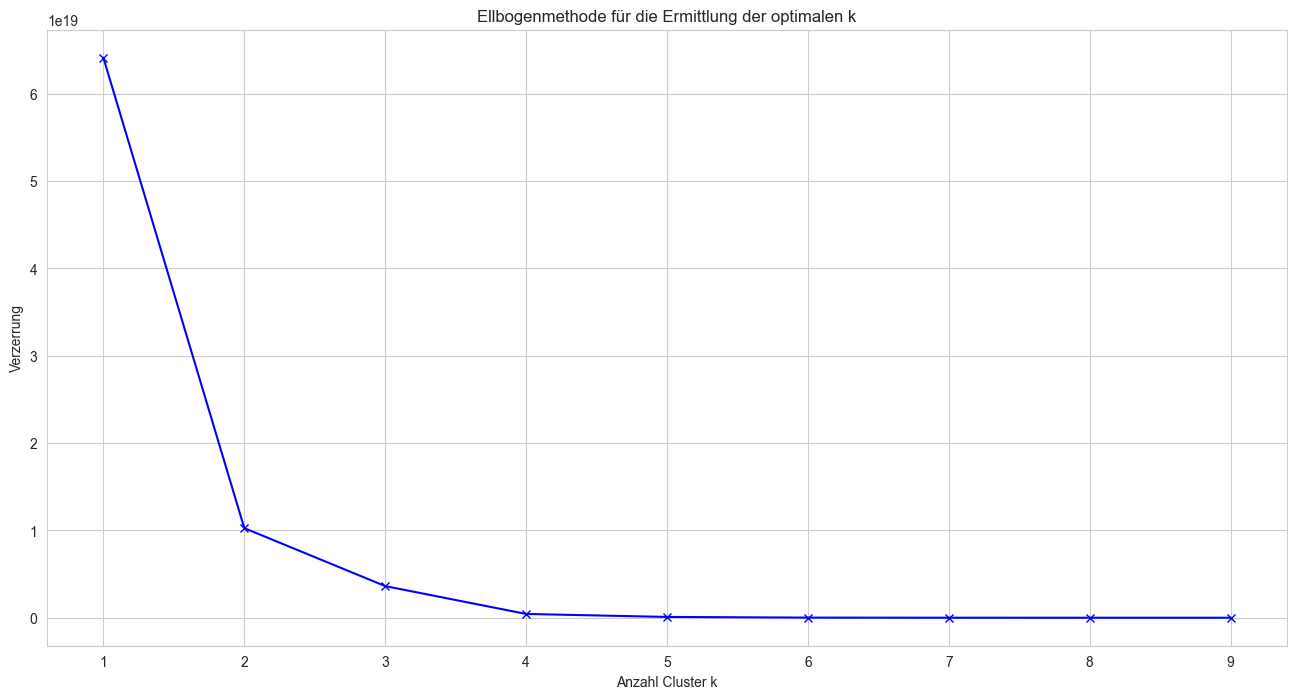

In [138]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Anzahl Cluster k')
plt.ylabel('Verzerrung')
plt.title('Ellbogenmethode für die Ermittlung der optimalen k')
plt.show()

In [139]:
km = KMeans(
    n_clusters=10, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)
km.fit(train)

KMeans(init='random', n_clusters=10, n_init=10, random_state=0)

# Cluster Centers

In [140]:
cluster_centers = pd.DataFrame(km.cluster_centers_, columns=train.columns)
cluster_centers

,Reviews,Rating,days_since_update,Price,Category_FAMILY,Category_GAME,Category_Rare,Category_TOOLS,Size_Varies with device,Size_0.1-10MB,Size_10.1-20MB,Size_30.1-40MB,Size_20.1-30MB,Type_Free,Content Rating_Everyone,Content Rating_Teen,Genres_Entertainment,Genres_Rare,Genres_Education,Installs
0,-0.061588,0.168779,-0.335119,4.349720e-03,0.148102,0.165526,3.422526e-02,0.065339,0.322962,1.605476e-01,0.136279,0.065339,1.076540e-01,0.999378,0.731176,0.152458,0.052271,1.692595e-01,2.862477e-02,8.108276e+06
1,-0.139486,0.046353,-0.145755,5.086124e-02,0.177033,0.099681,7.097289e-02,0.063796,0.177033,2.767145e-01,0.168262,0.065391,1.236045e-01,0.982456,0.762360,0.136364,0.062201,1.921850e-01,4.465710e-02,1.000000e+06
2,0.970320,0.372758,-0.480676,4.440892e-16,0.097173,0.318021,8.833922e-03,0.067138,0.507067,4.593640e-02,0.063604,0.060071,4.593640e-02,1.000000,0.703180,0.180212,0.042403,1.484099e-01,-5.551115e-17,7.950530e+07
3,6.705708,0.088940,-0.634453,0.000000e+00,0.021277,0.063830,1.387779e-17,0.042553,0.851064,5.551115e-17,0.085106,0.000000,2.775558e-17,1.000000,0.617021,0.319149,0.042553,0.000000e+00,1.387779e-17,1.000000e+09
4,-0.147576,-0.059548,-0.038424,7.185355e-02,0.199085,0.112128,8.924485e-02,0.054920,0.091533,3.729977e-01,0.155606,0.091533,1.121281e-01,0.977117,0.743707,0.116705,0.057208,2.128146e-01,3.432494e-02,5.000000e+05
5,-0.150955,-0.314221,0.297445,2.418701e+00,0.225329,0.050987,8.223684e-02,0.100329,0.036184,5.476974e-01,0.162829,0.055921,1.093750e-01,0.871711,0.870888,0.069901,0.070724,1.455592e-01,7.894737e-02,8.425164e+03
6,-0.151042,0.068956,0.202857,1.682226e+00,0.188776,0.044063,4.313544e-02,0.087662,0.027365,5.612245e-01,0.191558,0.041280,1.173469e-01,0.835807,0.875696,0.076994,0.063544,8.348794e-02,7.792208e-02,4.295343e+02
7,2.796472,0.281892,-0.603714,0.000000e+00,0.050000,0.200000,0.000000e+00,0.116667,0.583333,5.551115e-17,0.100000,0.050000,5.000000e-02,1.000000,0.766667,0.133333,0.000000,-2.775558e-17,1.387779e-17,5.000000e+08
8,-0.150092,-0.228170,0.209187,9.894880e-01,0.222892,0.089608,1.129518e-01,0.093373,0.091114,4.390060e-01,0.153614,0.069277,1.182229e-01,0.917922,0.810994,0.100904,0.060994,2.206325e-01,5.496988e-02,8.550452e+04
9,14.751802,1.027505,-0.644024,0.000000e+00,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,5.000000e+08


# Predict

In [141]:
train_pred = train
train_pred['cluster_predict'] = km.predict(train)

In [142]:
train_pred.shape

(8672, 21)

In [143]:
train_pred.head()

,Reviews,Rating,days_since_update,Price,Category_FAMILY,Category_GAME,Category_Rare,Category_TOOLS,Size_Varies with device,Size_0.1-10MB,...,Size_30.1-40MB,Size_20.1-30MB,Type_Free,Content Rating_Everyone,Content Rating_Teen,Genres_Entertainment,Genres_Rare,Genres_Education,Installs,cluster_predict
0,-0.144827,0.403271,-0.603588,0.0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1000000,1
1,-0.150937,-1.053274,0.637297,0.0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,50000,8
2,-0.151044,1.651738,3.887354,0.0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,100,6
3,-0.150943,1.027505,-0.613697,0.0,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,10000,5
4,-0.122954,0.611349,-0.570733,0.0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,5000000,0


In [144]:
test_pred = test
test_pred['cluster_predict'] = km.predict(test)
test_pred.shape

(2168, 21)

In [145]:
train_orig_pred = train_orig
train_orig_pred = pd.concat([train_orig_pred.reset_index(drop=True),train_pred[['cluster_predict']]], axis=1)

In [146]:
train[['cluster_predict']]

,cluster_predict
0,1
1,8
2,6
3,5
4,0
...,...
8667,0
8668,0
8669,0
8670,8


## Interpreting Results

In [147]:
train[['cluster_predict']].groupby('cluster_predict').value_counts()

cluster_predict
0    1607
1    1254
2     566
3      47
4     437
5    1216
6    2156
7      60
8    1328
9       1
dtype: int64

In [148]:
test[['cluster_predict']].groupby('cluster_predict').value_counts()

cluster_predict
0    397
1    325
2    132
3     11
4    102
5    315
6    555
7     11
8    320
dtype: int64

In [149]:
train.groupby('cluster_predict').describe()

Reviews                                                        \
                  count       mean       std        min        25%        50%   
cluster_predict                                                                 
0                1607.0  -0.061588  0.114187  -0.151025  -0.127647  -0.098129   
1                1254.0  -0.139486  0.012510  -0.151048  -0.147173  -0.143214   
2                 566.0   0.970320  1.535016  -0.147714   0.167233   0.440598   
3                  47.0   6.705708  8.766186   0.153713   1.036325   3.055878   
4                 437.0  -0.147576  0.005144  -0.150994  -0.150090  -0.149097   
5                1216.0  -0.150955  0.000192  -0.151048  -0.151030  -0.151009   
6                2156.0  -0.151042  0.000014  -0.151048  -0.151048  -0.151047   
7                  60.0   2.796472  2.272365  -0.052963   0.571970   2.611221   
8                1328.0  -0.150092  0.001658  -0.151048  -0.150873  -0.150618   
9                   1.0  14.751802       NaN  14.751802  14.751802  14.751802   

                                       Rating            ... Genres_Education  \
                       75%        max   count      mean  ...              75%   
cluster_predict                                          ...                    
0                -0.042099   0.923326  1607.0  0.168779  ...              0.0   
1                -0.136594  -0.020404  1254.0  0.046353  ...              0.0   
2                 1.393313  15.438445   566.0  0.372758  ...              0.0   
3                 9.116847  26.989580    47.0  0.088940  ...              0.0   
4                -0.147446  -0.092719   437.0 -0.059548  ...              0.0   
5                -0.150961  -0.147489  1216.0 -0.314221  ...              0.0   
6                -0.151043  -0.150775  2156.0  0.068956  ...              0.0   
7                 3.900481   7.637880    60.0  0.281892  ...              0.0   
8                -0.150029  -0.131228  1328.0 -0.228170  ...              0.0   
9                14.751802  14.751802     1.0  1.027505  ...              0.0   

                     Installs                                            \
                 max    count          mean           std           min   
cluster_predict                                                           
0                1.0   1607.0  8.108276e+06  2.425626e+06  5.000000e+06   
1                1.0   1254.0  1.000000e+06  0.000000e+00  1.000000e+06   
2                0.0    566.0  7.950530e+07  2.461245e+07  5.000000e+07   
3                0.0     47.0  1.000000e+09  0.000000e+00  1.000000e+09   
4                1.0    437.0  5.000000e+05  0.000000e+00  5.000000e+05   
5                1.0   1216.0  8.425164e+03  2.323469e+03  5.000000e+03   
6                1.0   2156.0  4.295343e+02  4.320797e+02  0.000000e+00   
7                0.0     60.0  5.000000e+08  0.000000e+00  5.000000e+08   
8                1.0   1328.0  8.550452e+04  2.269456e+04  5.000000e+04   
9                0.0      1.0  5.000000e+08           NaN  5.000000e+08   

                                                                         
                          25%           50%           75%           max  
cluster_predict                                                          
0                5.000000e+06  1.000000e+07  1.000000e+07  1.000000e+07  
1                1.000000e+06  1.000000e+06  1.000000e+06  1.000000e+06  
2                5.000000e+07  1.000000e+08  1.000000e+08  1.000000e+08  
3                1.000000e+09  1.000000e+09  1.000000e+09  1.000000e+09  
4                5.000000e+05  5.000000e+05  5.000000e+05  5.000000e+05  
5                5.000000e+03  1.000000e+04  1.000000e+04  1.000000e+04  
6                5.000000e+01  1.000000e+02  1.000000e+03  1.000000e+03  
7                5.000000e+08  5.000000e+08  5.000000e+08  5.000000e+08  
8                5.000000e+04  1.000000e+05  1.000000e+05  1.000000e+05  
9                5.000000e+08  5.000000e+08 

In [150]:
res = train.groupby('cluster_predict').describe()
res = pd.DataFrame(res)
res.to_csv("Results_Clustering.csv",index=False)

In [151]:
train_orig_pred.groupby('cluster_predict').describe()

Rating                                             
                  count      mean       std  min  25%  50%  75%  max
cluster_predict                                                     
0.0              1607.0  4.287306  0.295989  2.0  4.1  4.3  4.5  4.9
1.0              1252.0  4.228355  0.346921  2.2  4.1  4.3  4.5  4.9
2.0               566.0  4.385336  0.192093  3.5  4.3  4.4  4.5  4.8
3.0                47.0  4.248936  0.218565  3.7  4.1  4.3  4.4  4.5
4.0               437.0  4.177574  0.439297  1.8  4.0  4.3  4.5  4.9
5.0              1141.0  4.039089  0.609124  1.4  3.8  4.2  4.5  5.0
6.0              1086.0  4.179558  0.837324  1.0  3.8  4.4  4.8  5.0
7.0                60.0  4.341667  0.151032  4.0  4.3  4.3  4.5  4.6
8.0              1305.0  4.092950  0.502032  1.6  3.9  4.2  4.4  4.9
9.0                 1.0  4.700000       NaN  4.7  4.7  4.7  4.7  4.7

In [152]:
def my_boxplot_fct(data,variable):
    fig = px.box(data, x="cluster_predict", y=variable)
    fig.show()

In [153]:
my_boxplot_fct(train_orig_pred, "Price")

In [154]:
my_boxplot_fct(train_orig_pred, "Rating")

In [155]:
my_boxplot_fct(train_orig_pred, "Content Rating")

# Visualizing Model


Für die Resultate zu visualisieren müssen wir die vielen Variablen auf eine 2-dimensionale Darstellung bringen. Dafür gibt es so zu sagen Dimension Reduktionsverfahren. Hier verwenden wir das t-SNE Verfahren. Wir gehen nun nicht weiter in die Details ein.

In [156]:
#execudting the tsne method, set random state that you can get the same results as me
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
train_tsne = tsne.fit_transform(train)
# saving data as pandas data frame
df_tsne = pd.DataFrame(train_tsne, columns = ['TSNE_DIM1', 'TSNE_DIM2'])
#df_tsne.describe()
# joining the tsne transformed data to the original data
train_pred = pd.concat([train_pred,df_tsne], axis = 1)
train_pred.describe()

,Reviews,Rating,days_since_update,Price,Category_FAMILY,Category_GAME,Category_Rare,Category_TOOLS,Size_Varies with device,Size_0.1-10MB,...,Type_Free,Content Rating_Everyone,Content Rating_Teen,Genres_Entertainment,Genres_Rare,Genres_Education,Installs,cluster_predict,TSNE_DIM1,TSNE_DIM2
count,8.672000e+03,8.672000e+03,8.672000e+03,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,...,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8.672000e+03,8672.000000,8672.000000,8672.000000
mean,3.666604e-17,2.041827e-15,-3.594910e-17,0.920691,0.182542,0.105051,0.061232,0.079797,0.157749,0.375115,...,0.924815,0.801891,0.112661,0.059617,0.154520,0.052352,1.581264e+07,3.960332,0.983382,-0.721773
std,1.000058e+00,1.000058e+00,1.000058e+00,14.406743,0.386312,0.306636,0.239768,0.270994,0.364527,0.484181,...,0.263704,0.398598,0.316197,0.236790,0.361468,0.222750,8.599156e+07,2.860465,47.186775,40.728001
min,-1.510480e-01,-6.671377e+00,-6.566602e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-101.140594,-93.900398
25%,-1.510348e-01,-2.209628e-01,-6.086422e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+03,1.000000,-32.108002,-29.191544
50%,-1.502967e-01,1.951930e-01,-4.645884e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05,5.000000,-1.229661,0.449074
75%,-1.316782e-01,6.113488e-01,1.628040e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+06,6.000000,36.872708,26.733657
max,2.698958e+01,1.651738e+00,6.927648e+00,399.990000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+09,9.000000,113.189873,96.795143


In [157]:
# representing the data
fig = px.scatter(train_pred, x="TSNE_DIM1", y="TSNE_DIM2",color="cluster_predict",
                 labels= {
                     "TSNE_DIM1": "Dimension 1",
                     "TSNE_DIM2": "Dimension 2",
                     "cluster_predict": "Number of associated cluster"
                 },
                 title= "Representation of the dimension reduction by t-SNE")
fig.show()